## Importing required libraries

In [1]:
## Installing h2o library
! pip install h2o 

In [2]:
# Importing all the required packages
import pandas as pd         #  For data manipulation
import numpy as np          #  For mathematical calculations
from functools import reduce
%matplotlib inline         
import matplotlib.pyplot as plt   # For Graphs
import matplotlib.lines as mlines  # For Graphs
from mpl_toolkits.mplot3d import Axes3D  # For Graphs
import seaborn as sns  # For Graphs
import warnings  # For warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import h2o        # For h2o model
from sklearn.model_selection import train_test_split        # For dividing data into training and test set
warnings.filterwarnings("ignore", category=DeprecationWarning)       
from h2o.estimators.gbm import H2OGradientBoostingEstimator        # For h2o Gradient Boosting model
from h2o.estimators import H2ODeepLearningEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.gam import H2OGeneralizedAdditiveEstimator
from h2o.estimators import H2ONaiveBayesEstimator
from h2o.estimators import H2ORuleFitEstimator
from h2o.estimators import H2OXGBoostEstimator
from h2o.estimators import H2OStackedEnsembleEstimator
import time

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# initialize h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqfk566u8
  JVM stdout: /tmp/tmpqfk566u8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqfk566u8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.5
H2O_cluster_version_age:,"7 days, 9 hours and 52 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_8hgxt6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


## Data Preparation

In [5]:
# importing data file using pandas library
data= pd.read_csv("/content/drive/MyDrive/general_data.csv")
empSurvey = pd.read_csv("/content/drive/MyDrive/employee_survey_data.csv")
mngSurvey = pd.read_csv("/content/drive/MyDrive/manager_survey_data.csv")
dfs = [data, empSurvey, mngSurvey]
data = reduce(lambda left,right: pd.merge(left,right,on='EmployeeID'), dfs)

In [6]:
# For comparitive anaysis
score= pd.DataFrame()

## Exploratory Data Analysis

In [7]:
# checking for null values in data
data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
EnvironmentSatisfaction     True
JobSatisfaction             True
WorkLifeBalance             True
JobInvolvement             False
PerformanceRating          False
dtype: bool

In [8]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [9]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   object 
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   EmployeeCount            4300 non-null   int64  
 8   EmployeeID               4300 non-null   int64  
 9   Gender                   4300 non-null   object 
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   object 
 12  MaritalStatus            4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked      

In [10]:
data.Attrition.value_counts()

No     3605
Yes     695
Name: Attrition, dtype: int64

Class no: 3605
Class Yes: 695
Proportion: 5.19 : 1


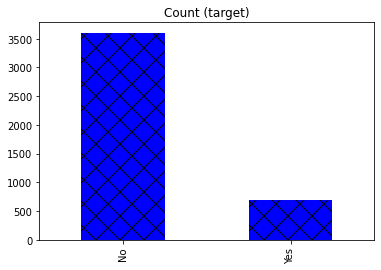

In [11]:
target_count = data.Attrition.value_counts()
print('Class no:', target_count[0])
print('Class Yes:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

plt.figure(figsize=(6,4))
target_count.plot(kind='bar',title='Count (target)', color='b', hatch='x');

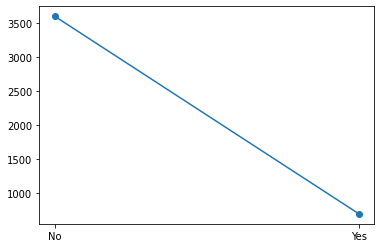

In [12]:
plt.figure(figsize=(6,4))
plt.plot(target_count,marker='o') 

In [13]:
count_class_0, count_class_1 = data.Attrition.value_counts()

# Divide by class
data_class_0 = data[data['Attrition'] == 'No']
data_class_1 = data[data['Attrition'] == 'Yes']

Random over-sampling:
Yes    3605
No     3605
Name: Attrition, dtype: int64


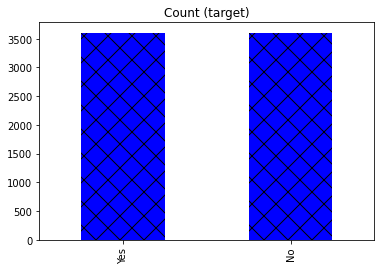

In [14]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_over = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random over-sampling:')
print(data_over.Attrition.value_counts())

plt.figure(figsize=(6,4))
data_over.Attrition.value_counts().plot(kind='bar', title='Count (target)',color='b', hatch='x')

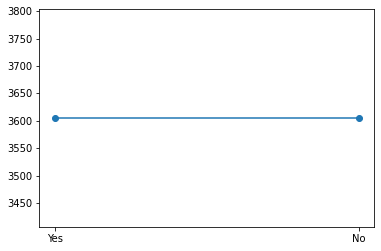

In [15]:
plt.figure(figsize=(6,4))
plt.plot(data_over.Attrition.value_counts(),marker='o')

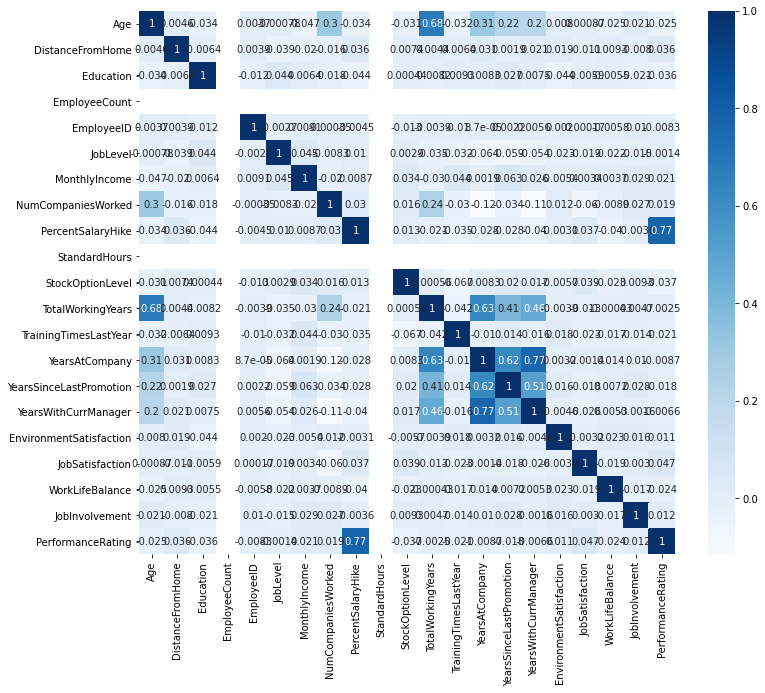

In [16]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [17]:
#Label Encoding for object to numeric conversion
le = LabelEncoder()

In [18]:
le.fit(data['Attrition'])
data['Attrition']= le.transform(data['Attrition'])
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,Travel_Rarely,Sales,4,3,Other,1,4405,Female,2,Human Resources,Single,35390,1.0,Y,18,8,0,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [19]:
#Label Encoding for object to numeric conversion
ole = LabelEncoder()

In [20]:
objList = data.select_dtypes(include = "object").columns
objList

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='object')

In [21]:
for feat in objList:
    data[feat] = ole.fit_transform(data[feat].astype(str))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   int64  
 2   BusinessTravel           4300 non-null   int64  
 3   Department               4300 non-null   int64  
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   int64  
 7   EmployeeCount            4300 non-null   int64  
 8   EmployeeID               4300 non-null   int64  
 9   Gender                   4300 non-null   int64  
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   int64  
 12  MaritalStatus            4300 non-null   int64  
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked      

In [22]:
X = data.drop("Attrition", axis=1)
y = data["Attrition"]

In [23]:
chi_scores = chi2(X,y)
chi_scores

(array([2.35758507e+02, 4.22677433e-03, 1.88234960e+00, 2.11815804e+00,
        3.59785239e-01, 1.04485118e+01, 0.00000000e+00, 9.16724689e+00,
        5.99735824e-01, 5.41982258e-01, 4.68600961e+00, 5.39519081e+01,
        1.55698877e+05, 1.91944075e+01,            nan, 4.49364238e+00,
        0.00000000e+00, 2.50176091e-01, 6.57425307e+02, 5.47104437e+00,
        4.12878655e+02, 1.83569673e+01, 3.19510598e+02, 2.02209262e+01,
        2.03601839e+01, 2.79088210e+00, 1.72095478e-01, 1.22472976e-01]),
 array([3.30806599e-053, 9.48163134e-001, 1.70067341e-001, 1.45561515e-001,
        5.48625532e-001, 1.22748310e-003, 1.00000000e+000, 2.46384943e-003,
        4.38678839e-001, 4.61612374e-001, 3.04091888e-002, 2.05457394e-013,
        0.00000000e+000, 1.18058756e-005,             nan, 3.40211177e-002,
        1.00000000e+000, 6.16951114e-001, 5.42334546e-145, 1.93340686e-002,
        8.66008972e-092, 1.83148006e-005, 1.85141568e-071, 6.89940647e-006,
        6.41507665e-006, 9.48020295e-0

In [24]:
probabilty = pd.Series(chi_scores[1],index = X.columns)
probabilty.sort_values(ascending = False , inplace = True)

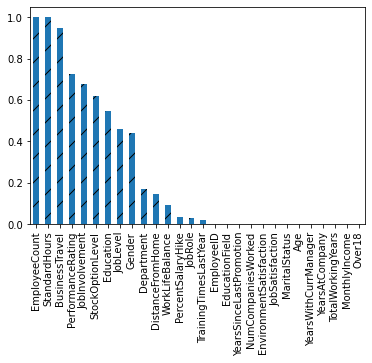

In [25]:
plt.figure(figsize=(6,4))
probabilty.plot.bar(hatch='/')

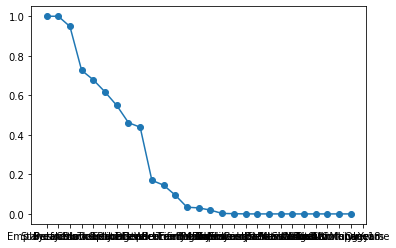

In [26]:
plt.figure(figsize=(6,4))
plt.plot(probabilty,marker='o')

In [27]:
dfscores = pd.DataFrame(chi_scores[0])
dfprobability = pd.DataFrame(chi_scores[1])
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfprobability,dfscores],axis=1)
featureScores.columns = ['Features','probability','Score'] 
featureScores

,Features,probability,Score
0,Age,3.308066e-53,235.758507
1,BusinessTravel,9.481631e-01,0.004227
2,Department,1.700673e-01,1.882350
3,DistanceFromHome,1.455615e-01,2.118158
4,Education,5.486255e-01,0.359785
5,EducationField,1.227483e-03,10.448512
6,EmployeeCount,1.000000e+00,0.000000
7,EmployeeID,2.463849e-03,9.167247
8,Gender,4.386788e-01,0.599736
9,JobLevel,4.616124e-01,0.541982


In [28]:
featureScores = featureScores[featureScores['probability']<0.05]
featureScores.sort_values(by='Score')

,Features,probability,Score
15,PercentSalaryHike,3.402112e-02,4.493642
10,JobRole,3.040919e-02,4.686010
19,TrainingTimesLastYear,1.933407e-02,5.471044
7,EmployeeID,2.463849e-03,9.167247
5,EducationField,1.227483e-03,10.448512
21,YearsSinceLastPromotion,1.831480e-05,18.356967
13,NumCompaniesWorked,1.180588e-05,19.194407
23,EnvironmentSatisfaction,6.899406e-06,20.220926
24,JobSatisfaction,6.415077e-06,20.360184
11,MaritalStatus,2.054574e-13,53.951908


In [29]:
X=X[featureScores['Features']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   EducationField           4300 non-null   int64  
 2   EmployeeID               4300 non-null   int64  
 3   JobRole                  4300 non-null   int64  
 4   MaritalStatus            4300 non-null   int64  
 5   MonthlyIncome            4300 non-null   int64  
 6   NumCompaniesWorked       4300 non-null   float64
 7   PercentSalaryHike        4300 non-null   int64  
 8   TotalWorkingYears        4300 non-null   float64
 9   TrainingTimesLastYear    4300 non-null   int64  
 10  YearsAtCompany           4300 non-null   int64  
 11  YearsSinceLastPromotion  4300 non-null   int64  
 12  YearsWithCurrManager     4300 non-null   int64  
 13  EnvironmentSatisfaction  4300 non-null   float64
 14  JobSatisfaction         

## Data PreProcessing

In [30]:
# initialize h2o
hf = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [31]:
hf['Attrition']= hf['Attrition'].asfactor()

In [32]:
# initialize h2o
features = X.columns.to_list()
target = "Attrition"
train,test,valid = hf.split_frame(ratios=[.7,.15])
train

Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
31,1,1,1,10,1,1,1,2,0,1,6,2,41890,0,0,23,8,1,6,3,5,1,4,3,2,4,2,4
32,0,1,1,17,4,4,1,3,1,4,7,1,193280,1,0,15,8,3,5,2,5,0,3,2,2,1,3,3
38,0,0,1,2,5,1,1,4,1,3,1,1,83210,3,0,11,8,3,13,5,8,7,5,4,4,3,2,3
46,0,2,1,8,3,1,1,6,0,4,5,1,40710,3,0,13,8,0,28,5,7,7,7,3,2,2,3,3
28,1,2,1,11,2,3,1,7,1,2,7,2,58130,2,0,20,8,1,5,2,0,0,0,1,3,1,3,4
29,0,2,1,18,3,1,1,8,1,2,7,1,31430,2,0,22,8,3,10,2,0,0,0,1,2,3,3,4
31,0,2,1,1,3,1,1,9,1,3,2,1,20440,0,0,21,8,0,10,2,9,7,8,2,4,3,3,4
45,0,2,1,17,2,3,1,11,1,2,2,1,79910,0,0,13,8,2,21,2,20,4,10,3,4,3,2,3
55,0,2,1,14,4,1,1,13,0,1,7,2,55380,0,0,17,8,0,37,2,36,4,13,4,1,3,3,3
47,1,0,1,1,1,3,1,14,1,1,6,1,57620,1,0,11,8,2,10,4,10,9,9,1,2,2,2,3


In [33]:
test

Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
51,0,2,2,6,2,1,1,1,0,1,0,1,131160,1,0,11,8,0,1,6,1,0,0,3,4,2,3,3
25,0,0,1,7,4,3,1,10,0,4,2,0,134640,1,0,13,8,1,6,2,6,1,5,2,1,3,3,3
35,0,2,2,7,4,1,1,19,1,1,8,0,24380,7,0,16,8,0,10,5,7,6,2,2,2,2,2,3
26,0,1,1,9,3,1,1,27,0,1,3,1,162910,1,0,22,8,0,5,3,5,3,3,1,1,3,3,4
26,1,2,1,4,3,3,1,31,1,3,6,0,68540,2,0,11,8,0,5,5,3,0,2,1,2,3,2,3
35,0,2,2,20,2,1,1,40,1,1,2,1,51540,0,0,19,8,0,12,2,11,6,9,3,2,2,2,3
39,0,2,2,1,4,1,1,57,1,1,7,1,196650,1,0,22,8,1,21,6,21,11,10,3,1,3,3,4
52,1,2,1,7,1,1,1,60,0,2,6,1,47740,2,0,18,8,1,11,2,8,7,7,3,2,2,3,3
32,0,2,1,7,3,5,1,65,1,2,0,2,24720,7,0,13,8,0,10,2,7,0,7,1,4,2,3,3
43,0,1,1,14,3,3,1,73,0,5,5,0,38860,1,0,17,8,2,9,2,9,0,0,3,3,4,3,3


##Deep Learning

In [34]:
start = time.time()
print("timer started")

timer started


In [35]:
# Build and train the model:
dl = H2ODeepLearningEstimator(distribution="bernoulli",
                               hidden=[1],
                               epochs=1000,
                               train_samples_per_iteration=-1,
                               reproducible=True,
                               activation="Tanh",
                               single_node_mode=False,
                               balance_classes=False,
                               force_load_balance=False,
                               seed=23123,
                               tweedie_power=1.5,
                               score_training_samples=0,
                               score_validation_samples=0,
                               stopping_rounds=0)

In [36]:
 dl.train(x=features, y=target, training_frame=train, validation_frame=test)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [37]:
# Generate predictions on a test set (if necessary):
pred = dl.predict(valid)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [38]:
# Eval performance:
perf = dl.model_performance()

In [39]:
perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1802913813612: 


,,0,1,Error,Rate
0,0,1996.0,551.0,0.2163,(551.0/2547.0)
1,1,192.0,295.0,0.3943,(192.0/487.0)
2,Total,2188.0,846.0,0.2449,(743.0/3034.0)


In [40]:
accuracy = np.round(perf.accuracy()[0][1],2)
f1 = np.round(perf.F1()[0][1],2)
auc = np.round(perf.auc(),2)
exec =(time.time() - start)
score=score.append([["DL",accuracy,f1,auc,exec]])
score

,0,1,2,3,4
0,DL,0.85,0.44,0.75,49.952567


## Distributed Random Forest (DRF)

In [41]:
start = time.time()
print("timer started")

timer started


In [42]:
# Build and train the model:
drf = H2ORandomForestEstimator(ntrees=10,
                                    max_depth=5,
                                    min_rows=10,
                                    calibrate_model=True,
                                    calibration_frame=valid,
                                    binomial_double_trees=True)

In [43]:
drf.train(x=features, y=target, training_frame=train, validation_frame=test)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [44]:
# Generate predictions on a validation set (if necessary):
pred = drf.predict(valid)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [45]:
# Eval performance:
perf = drf.model_performance()
perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22533181982855058: 


,,0,1,Error,Rate
0,0,2188.0,338.0,0.1338,(338.0/2526.0)
1,1,228.0,255.0,0.472,(228.0/483.0)
2,Total,2416.0,593.0,0.1881,(566.0/3009.0)


In [46]:
accuracy = np.round(perf.accuracy()[0][1],2)
f1 = np.round(perf.F1()[0][1],2)
auc = np.round(perf.auc(),2)
exec =(time.time() - start)
score=score.append([["DRF",accuracy,f1,auc,exec]])
score

,0,1,2,3,4
0,DL,0.85,0.44,0.75,49.952567
0,DRF,0.86,0.47,0.75,2.175508


## Gradient Boosting Machine (GBM)

In [47]:
start = time.time()
print("timer started")

timer started


In [48]:
#We only provide the required parameters, everything else is default
gbm = H2OGradientBoostingEstimator(nfolds=5, seed=123, keep_cross_validation_predictions = True)
gbm.train(x=features, y=target, training_frame=train, validation_frame=test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [49]:
## Get the AUC on the validation set
perf = gbm.model_performance(valid)
perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29191123928594304: 


,,0,1,Error,Rate
0,0,529.0,19.0,0.0347,(19.0/548.0)
1,1,30.0,66.0,0.3125,(30.0/96.0)
2,Total,559.0,85.0,0.0761,(49.0/644.0)


In [50]:
accuracy = np.round(perf.accuracy()[0][1],2)
f1 = np.round(perf.F1()[0][1],2)
auc = np.round(perf.auc(),2)
exec =(time.time() - start)
score=score.append([["GBM",accuracy,f1,auc,exec]])
score

,0,1,2,3,4
0,DL,0.85,0.44,0.75,49.952567
0,DRF,0.86,0.47,0.75,2.175508
0,GBM,0.92,0.73,0.92,14.109959


## RuleFit

In [51]:
start = time.time()
print("timer started")

timer started


In [52]:
rfit = H2ORuleFitEstimator(max_rule_length=10, max_num_rules=100, seed=123)
rfit.train(training_frame=train, x=features, y=target, validation_frame=test)

rulefit Model Build progress: |███████████████████████████████████████████| 100%


In [53]:
# Retrieve the rule importance:
print(rfit._model_json['output']['rule_importance'])


Rule Importance: 


,,variable,coefficient,rule
0,,M3T0N98,-0.521431,(YearsWithCurrManager >= 0.5 or YearsWithCurrManager is NA) & (Yea...
1,,M6T49N221,-0.378169,(TotalWorkingYears >= 1.5 or TotalWorkingYears is NA) & (PercentSa...
2,,M0T34N22,-0.328211,(YearsWithCurrManager >= 0.5 or YearsWithCurrManager is NA) & (Env...
3,,M3T14N88,-0.325508,(TotalWorkingYears >= 1.5 or TotalWorkingYears is NA) & (Environme...
4,,M5T40N230,-0.301480,(Age >= 31.5 or Age is NA) & (PercentSalaryHike < 24.5 or PercentS...
5,,linear.MaritalStatus,0.283637,
6,,linear.JobSatisfaction,-0.212694,
7,,M3T1N88,-0.211883,(YearsAtCompany >= 1.5 or YearsAtCompany is NA) & (TotalWorkingYea...
8,,M2T33N72,-0.205779,(YearsAtCompany >= 1.5 or YearsAtCompany is NA) & (TotalWorkingYea...
9,,M0T39N15,-0.192473,(NumCompaniesWorked < 4.5 or NumCompaniesWorked is NA) & (TotalWor...


In [54]:
## Get the AUC on the validation set
perf = rfit.model_performance(valid)
perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26719713404401124: 


,,0,1,Error,Rate
0,0,479.0,69.0,0.1259,(69.0/548.0)
1,1,46.0,50.0,0.4792,(46.0/96.0)
2,Total,525.0,119.0,0.1786,(115.0/644.0)


In [55]:
accuracy = np.round(perf.accuracy()[0][1],2)
f1 = np.round(perf.F1()[0][1],2)
auc = np.round(perf.auc(),2)
exec =(time.time() - start)
score=score.append([["RuleFit",accuracy,f1,auc,exec]])
score

,0,1,2,3,4
0,DL,0.85,0.44,0.75,49.952567
0,DRF,0.86,0.47,0.75,2.175508
0,GBM,0.92,0.73,0.92,14.109959
0,RuleFit,0.86,0.47,0.76,48.870723


## XGBoost

In [56]:
start = time.time()
print("timer started")

timer started


In [57]:
xgb = H2OXGBoostEstimator(booster='dart', normalize_type="tree", seed=123,nfolds=5,  keep_cross_validation_predictions = True)

In [58]:
xgb.train(x=features, y=target, training_frame=train, validation_frame=test)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [59]:
# Eval performance:
perf = xgb.model_performance()

In [60]:
# Generate predictions on a test set (if necessary):
pred = xgb.predict(valid)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [61]:
## Get the AUC on the validation set
perf = xgb.model_performance(valid)
perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3130705952644348: 


,,0,1,Error,Rate
0,0,543.0,5.0,0.0091,(5.0/548.0)
1,1,4.0,92.0,0.0417,(4.0/96.0)
2,Total,547.0,97.0,0.014,(9.0/644.0)


In [62]:
accuracy = np.round(perf.accuracy()[0][1],2)
f1 = np.round(perf.F1()[0][1],2)
auc = np.round(perf.auc(),2)
exec =(time.time() - start)
score=score.append([["XGBoost",accuracy,f1,auc,exec]])
score

,0,1,2,3,4
0,DL,0.85,0.44,0.75,49.952567
0,DRF,0.86,0.47,0.75,2.175508
0,GBM,0.92,0.73,0.92,14.109959
0,RuleFit,0.86,0.47,0.76,48.870723
0,XGBoost,0.99,0.95,0.98,14.486776


# Stacked Ensemble

In [63]:
start = time.time()
print("timer started")

timer started


In [64]:
# Train a stacked ensemble using the GBM and GLM above
ensemble = H2OStackedEnsembleEstimator(model_id="stackedEnsemble", base_models=[xgb, gbm])

In [65]:
ensemble.train(x=features, y=target, training_frame=train, validation_frame=test)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [66]:
# Eval ensemble performance on the valid data
perf = ensemble.model_performance(valid)

In [67]:
perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2519356283489413: 


,,0,1,Error,Rate
0,0,543.0,5.0,0.0091,(5.0/548.0)
1,1,4.0,92.0,0.0417,(4.0/96.0)
2,Total,547.0,97.0,0.014,(9.0/644.0)


In [68]:
accuracy = np.round(perf.accuracy()[0][1],2)
f1 = np.round(perf.F1()[0][1],2)
auc = np.round(perf.auc(),2)
exec =(time.time() - start)
score=score.append([["StackedEnsemble",accuracy,f1,auc,exec]])
score

,0,1,2,3,4
0,DL,0.85,0.44,0.75,49.952567
0,DRF,0.86,0.47,0.75,2.175508
0,GBM,0.92,0.73,0.92,14.109959
0,RuleFit,0.86,0.47,0.76,48.870723
0,XGBoost,0.99,0.95,0.98,14.486776
0,StackedEnsemble,0.99,0.95,0.98,1.319890


In [69]:
# initialize h2o
h2o.shutdown()

H2O session _sid_a62d closed.


#Comparitive Analysis

In [70]:
score.columns=['Model',"Accuracy",'F1-Score','AUC','Time Taken']

In [71]:
score

,Model,Accuracy,F1-Score,AUC,Time Taken
0,DL,0.85,0.44,0.75,49.952567
0,DRF,0.86,0.47,0.75,2.175508
0,GBM,0.92,0.73,0.92,14.109959
0,RuleFit,0.86,0.47,0.76,48.870723
0,XGBoost,0.99,0.95,0.98,14.486776
0,StackedEnsemble,0.99,0.95,0.98,1.319890


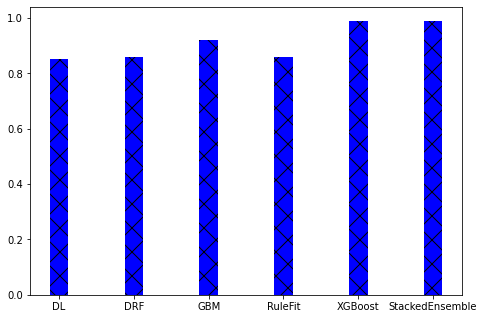

In [72]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(score['Model'],score['Accuracy'],  color = 'b', width = 0.25, hatch='x')
plt.show()

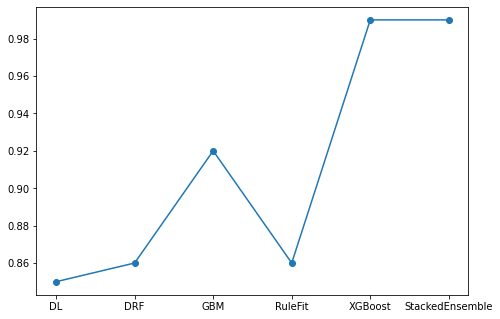

In [73]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
plt.plot(score['Model'],score['Accuracy'],marker='o') 
plt.show()

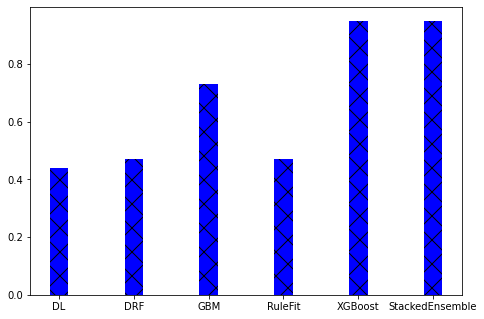

In [74]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(score['Model'], score['F1-Score'], color = 'b', width = 0.25, hatch='x')
plt.show()

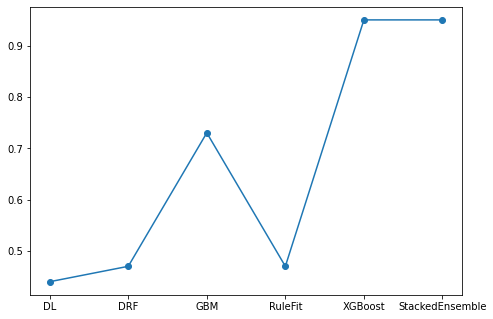

In [75]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
plt.plot(score['Model'],score['F1-Score'],marker='o') 
plt.show()

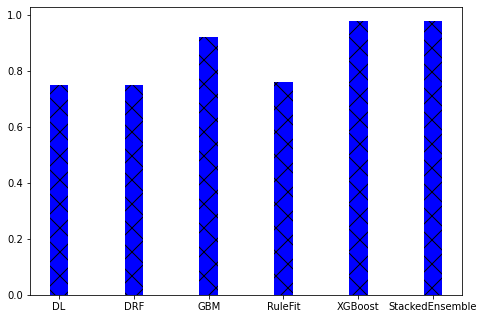

In [76]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(score['Model'], score['AUC'], color = 'b', width = 0.25, hatch='x')
plt.show()

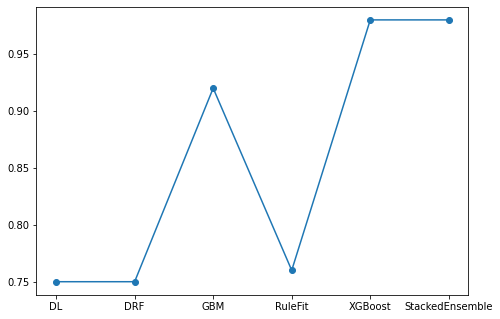

In [77]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
plt.plot(score['Model'],score['AUC'],marker='o') 
plt.show()

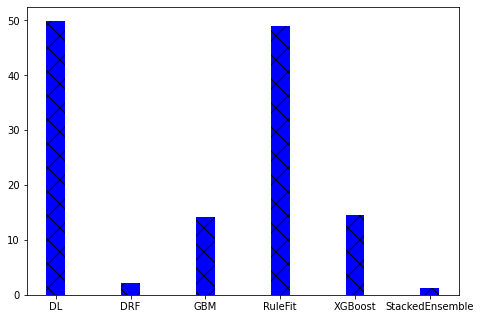

In [78]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(score['Model'], score['Time Taken'], color = 'b', width = 0.25, hatch='x')
plt.show()

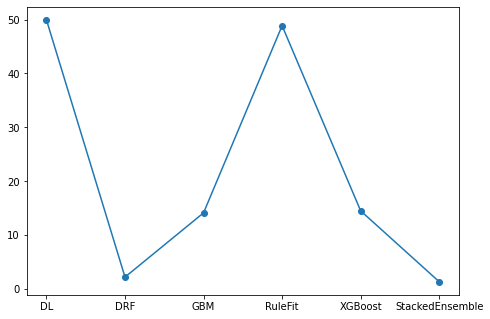

In [79]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
plt.plot(score['Model'],score['Time Taken'],marker='o') 
plt.show()